In [1]:
from local_tree_decomp import *
from help_functions import *

from local_hom_count_best import *

In [2]:
graph = graphs.CompleteBipartiteGraph(1, 2)
target_graph = graphs.CompleteGraph(3)

graph_clr = [0, 1, 1]
target_clr = [0, 1, 1]

# count_homomorphisms_best(graph, target_graph)

count_homomorphisms_best(graph, target_graph, 2, graph_clr, target_clr, colourful=True)


(5, {2})
Counter({1: 1}) Counter({1: 2, 0: 1}) [1]
Mappings length:  2
Mapped:  0
Mapped nbhs in target:  []
mapping:  0
Colour-perserving target vertex:  1
Mapping count:  [1, 0]
Colour-perserving target vertex:  2
Mapping count:  [1, 1]
DP table:  [{}, {}, {}, {}, {}, [1, 1], [1]]

(4, {0, 2})
Counter({0: 1, 1: 1}) Counter({1: 2, 0: 1}) [0, 1]
Mappings length:  2
Mapped:  0
Mapped nbhs in target:  [0]
mapping:  0
Colour-perserving target vertex:  0
Mapping count:  [0, 0]
Mapped:  1
Mapped nbhs in target:  [1]
mapping:  1
Colour-perserving target vertex:  0
Mapping count:  [0, 1]
DP table:  [{}, {}, {}, {}, [0, 1], [1, 1], [1]]


IndexError: list index out of range

In [ ]:
target_graph

In [ ]:
graph = graphs.CompleteBipartiteGraph(1, 3)
random_graph = graphs.RandomGNP(100, 0.6, seed=42)

%prun count_homomorphisms_best(graph, random_graph)

In [ ]:
%load_ext line_profiler

from local_hom_count_best import count_homomorphisms_best

%lprun -f count_homomorphisms_best(graph, target_graph)

In [3]:
g = graph

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

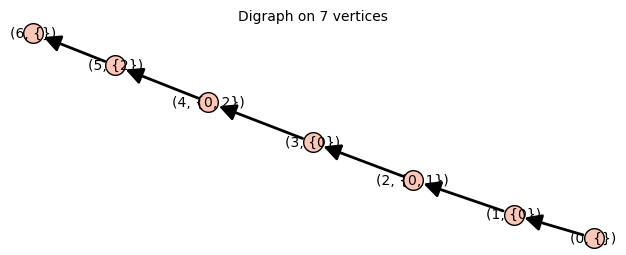

In [4]:
dir_labelled_TD

In [ ]:
node_changes(dir_labelled_TD)

In [ ]:
def best_speed_test(graph, target_graph, graph_clr, target_clr):
    # best_result = count_homomorphisms_best(graph, target_graph)
    # best_colour_result = count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

    print('Best result:')
    %timeit count_homomorphisms_best(graph, target_graph, density_threshold=2)

    print('\nBest colour result:')
    %timeit count_homomorphisms_best(graph, target_graph, 2, graph_clr, target_clr, True)


In [ ]:
import random
random.seed(int(42))

graph = graphs.CompleteBipartiteGraph(1, 2)
# target_graph = graphs.CompleteGraph(3)

graph_clr = [0, 1, 1]
# target_clr = [0, 1, 2]

for i in range(1, 11):
    N = i * 10
    random_graph = graphs.RandomGNP(N, 0.5, seed=42)
    random_clr = [random.randint(0, 1) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, random_graph, graph_clr, random_clr)
    print()

In [ ]:
import random

graph = graphs.CompleteBipartiteGraph(1, 3)
graph_clr = [0, 1, 1, 1]

target_graph = graphs.PetersenGraph()

max_num = 0

for _ in range(500):
    random_clr = [random.randint(0, 1) for _ in range(10)]
    num = count_homomorphisms_best(graph, target_graph, graph_clr, random_clr, colourful=True)
    if num > max_num:
        max_num = num

print(max_num)